In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import missingno as msno
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from time import time
%matplotlib inline

ModuleNotFoundError: No module named 'missingno'

In [186]:
train = pd.read_csv('train.csv',parse_dates=[2])
test = pd.read_csv('test.csv',parse_dates=[3])
store = pd.read_csv('store.csv')


/var/folders/qc/687qlt413094c21gdbw276kr0000gp/T/ipykernel_56526/1360072632.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv',parse_dates=[2])


In [187]:
train.info(), test.info(), store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088

(None, None, None)

In [188]:
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [189]:
store[pd.isnull(store.Promo2SinceWeek)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


/var/folders/qc/687qlt413094c21gdbw276kr0000gp/T/ipykernel_56526/3811528780.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train.Open!=0].Sales)


The skewness of Sales is 1.5939220392699809


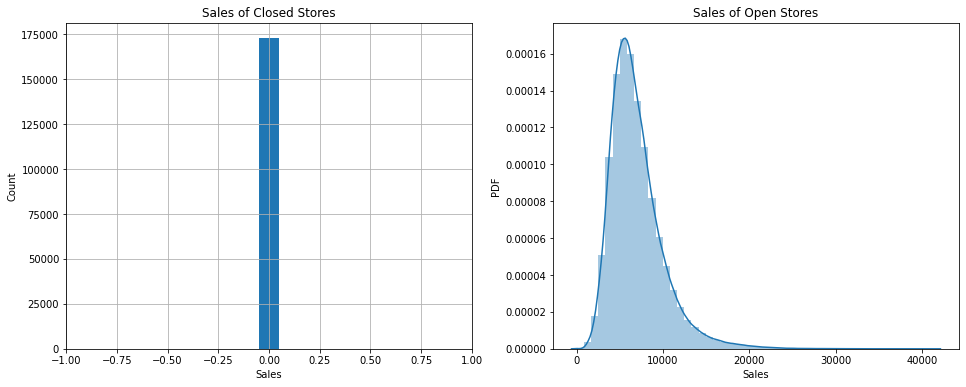

In [190]:
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Count')
ax1.set_title('Sales of Closed Stores')
plt.xlim(-1,1)
train.loc[train.Open==0].Sales.hist(align='left')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Sales')
ax2.set_ylabel('PDF')
ax2.set_title('Sales of Open Stores')
sns.distplot(train.loc[train.Open!=0].Sales)

print('The skewness of Sales is {}'.format(train.loc[train.Open!=0].Sales.skew()))

In [191]:
train = train.loc[train.Open != 0]
train = train.loc[train.Sales > 0].reset_index(drop=True)

In [192]:
train[train.isnull().values==True]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [193]:
test[test.isnull().values==True]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


<AxesSubplot:>

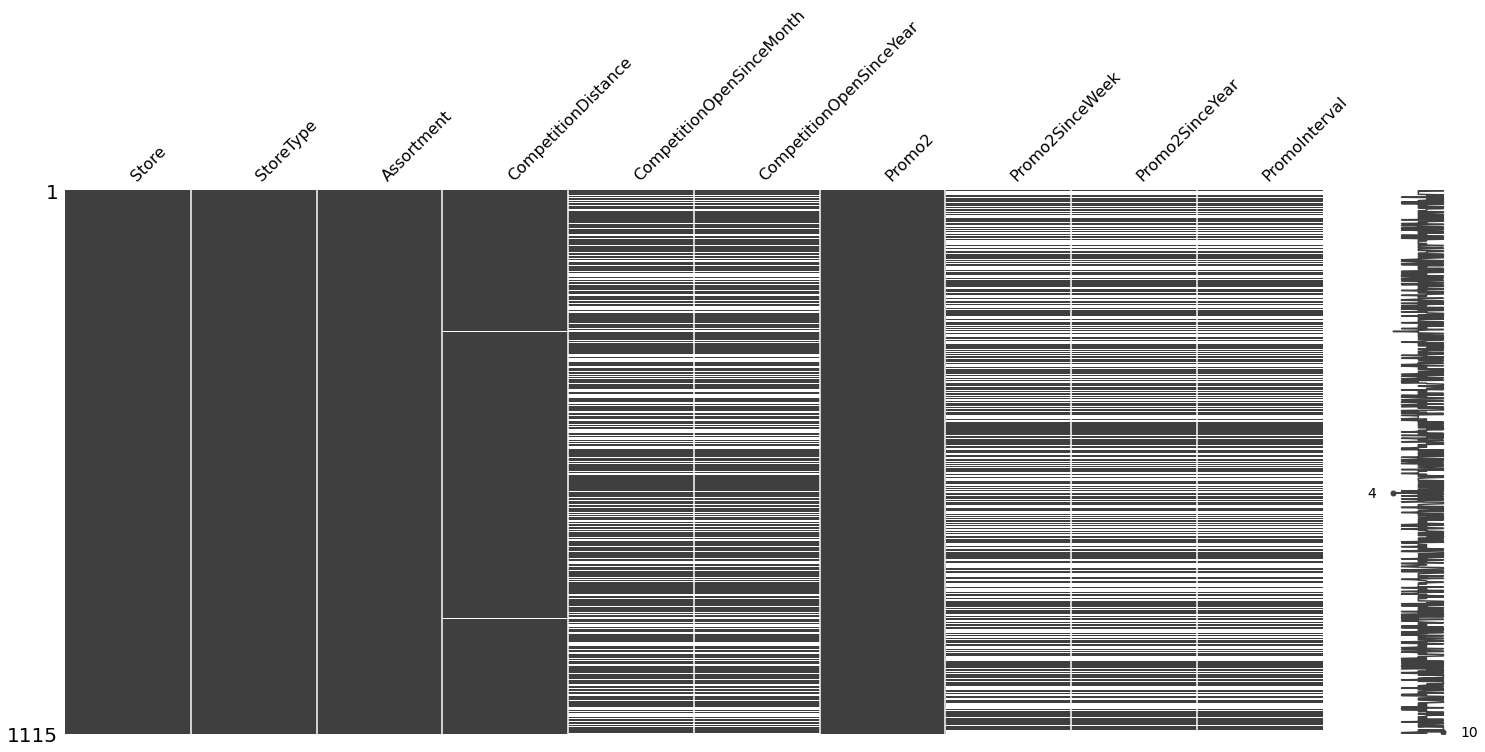

In [194]:
msno.matrix(store) #Visualize the missing values in store

In [195]:
test.fillna(1,inplace=True)


store.CompetitionDistance = store.CompetitionDistance.fillna(store.CompetitionDistance.median())


store.fillna(0,inplace=True)

In [196]:
X = store.iloc[:,:].values

In [197]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # replace the missing values using the most frequent value along each column

X = si.fit_transform(X)

store_new = pd.DataFrame(X,columns=list(store.columns))
print(store_new)

     Store StoreType Assortment CompetitionDistance CompetitionOpenSinceMonth  \
0        1         c          a              1270.0                       9.0   
1        2         a          a               570.0                      11.0   
2        3         a          a             14130.0                      12.0   
3        4         c          c               620.0                       9.0   
4        5         a          a             29910.0                       4.0   
...    ...       ...        ...                 ...                       ...   
1110  1111         a          a              1900.0                       6.0   
1111  1112         c          c              1880.0                       4.0   
1112  1113         a          c              9260.0                       0.0   
1113  1114         a          c               870.0                       0.0   
1114  1115         d          c              5350.0                       0.0   

     CompetitionOpenSinceYe

In [198]:
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [199]:
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

In [200]:
train=train.sort_values(['Date'],ascending = False)

In [201]:
def features_create(data):
    
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    data['StoreType'] = data['StoreType'].astype(int)
    data['Assortment'] = data['Assortment'].astype(int)
    data['StateHoliday'] = data['StateHoliday'].astype(int)

    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear

    data['CompetitionOpen'] = 12*(data.Year-data.CompetitionOpenSinceYear) + (data.Month-data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12*(data.Year-data.Promo2SinceYear) + (data.WeekOfYear-data.Promo2SinceWeek)/4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval==0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
    
    return data

In [202]:
features=[]     #Here we add all the elements of the list to the end of the list.

features.extend(['Store','CompetitionDistance','CompetitionOpenSinceMonth','StateHoliday','StoreType','Assortment',
                     'SchoolHoliday','CompetitionOpenSinceYear', 'Promo', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'])
    
features.extend(['Year','Month','Day','DayOfWeek','WeekOfYear'])   
features.extend(['CompetitionOpen','PromoOpen'])
features.append('IsPromoMonth')

In [203]:
features_create(train)  # We apply the function for the previous variables to each of the data sets 
features_create(test)

/var/folders/qc/687qlt413094c21gdbw276kr0000gp/T/ipykernel_56526/456949970.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear
/var/folders/qc/687qlt413094c21gdbw276kr0000gp/T/ipykernel_56526/456949970.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth
0,1,1,3,2015-09-17,1.0,1,0,0,3,1,...,0.0,,2015,9,17,38,84.0,24189.50,Sept,0
1,857,1,2,2015-09-16,1.0,1,0,0,3,1,...,0.0,,2015,9,16,38,84.0,24189.50,Sept,0
2,1713,1,1,2015-09-15,1.0,1,0,0,3,1,...,0.0,,2015,9,15,38,84.0,24189.50,Sept,0
3,2569,1,0,2015-09-14,1.0,1,0,0,3,1,...,0.0,,2015,9,14,38,84.0,24189.50,Sept,0
4,3425,1,6,2015-09-13,0.0,0,0,0,3,1,...,0.0,,2015,9,13,37,84.0,24189.25,Sept,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,37664,1115,2,2015-08-05,1.0,1,0,1,4,3,...,2012.0,"Mar,Jun,Sept,Dec",2015,8,5,32,24188.0,38.50,Aug,0
41084,38520,1115,1,2015-08-04,1.0,1,0,1,4,3,...,2012.0,"Mar,Jun,Sept,Dec",2015,8,4,32,24188.0,38.50,Aug,0
41085,39376,1115,0,2015-08-03,1.0,1,0,1,4,3,...,2012.0,"Mar,Jun,Sept,Dec",2015,8,3,32,24188.0,38.50,Aug,0
41086,40232,1115,6,2015-08-02,0.0,0,0,1,4,3,...,2012.0,"Mar,Jun,Sept,Dec",2015,8,2,31,24188.0,38.25,Aug,0


<AxesSubplot:>

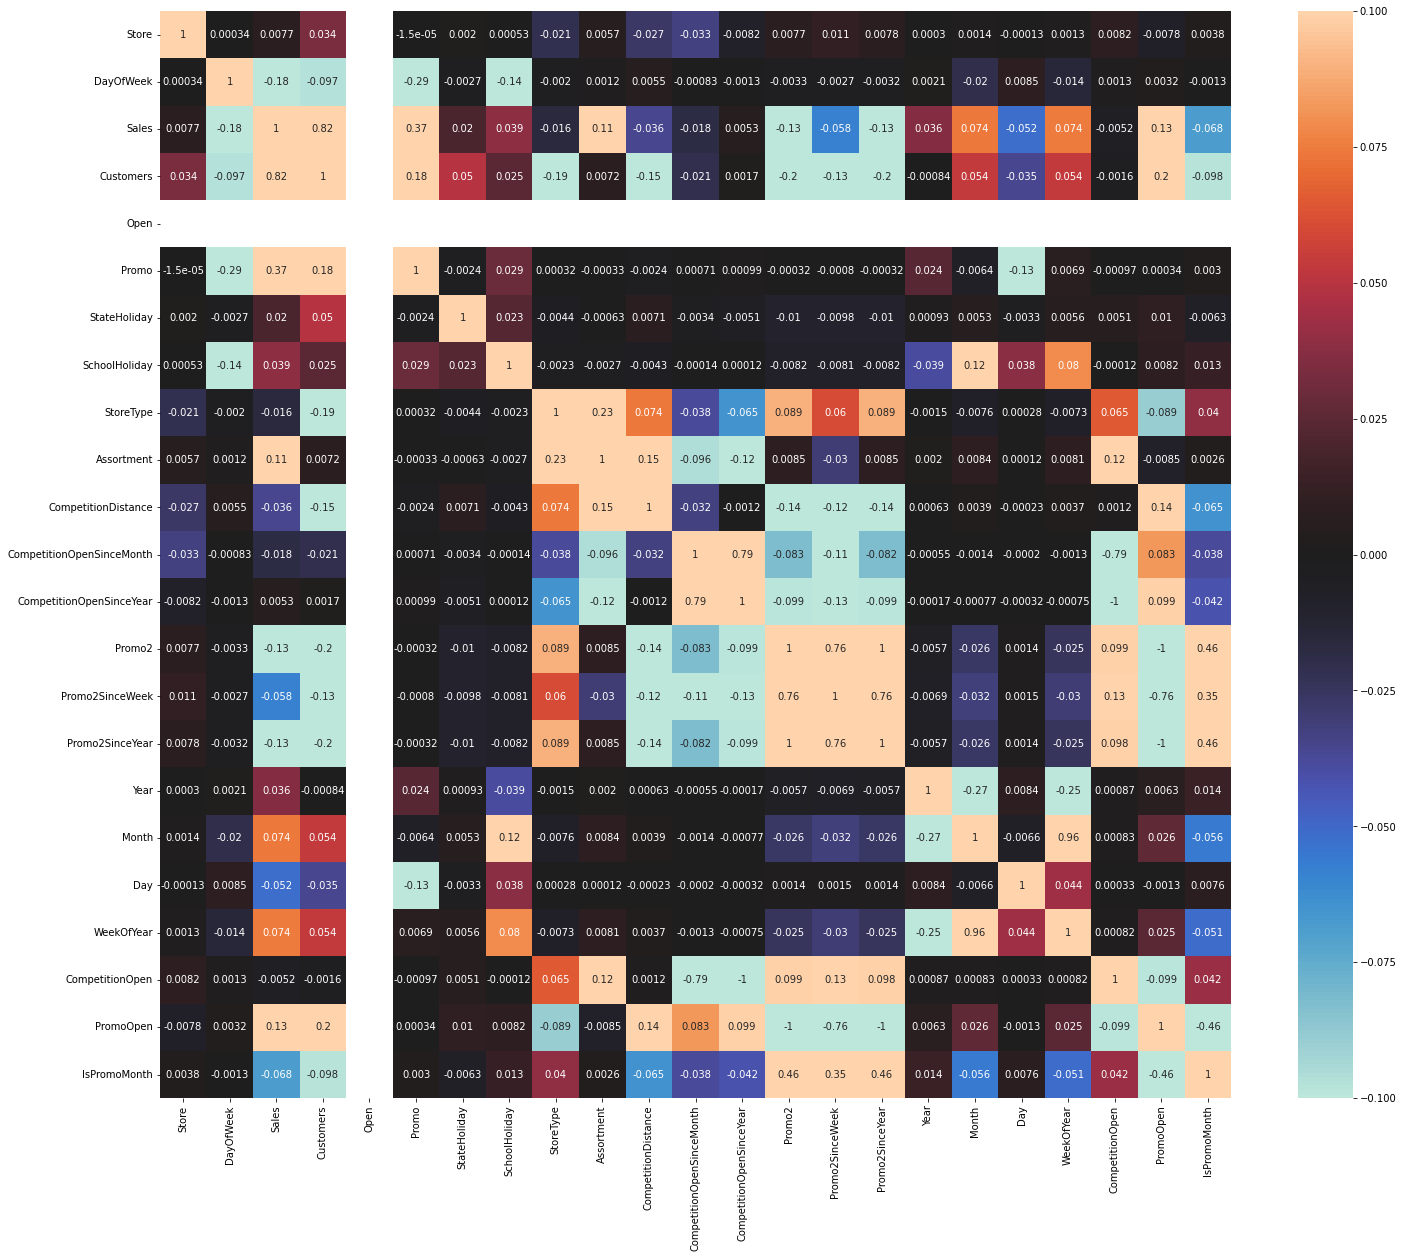

In [204]:
plt.subplots(figsize=(24,20))    # Visualizee thee relation between variabls 
sns.heatmap(train.corr(),annot=True,vmin=-0.1,vmax=0.1,center=0)

In [205]:
xtrain=train.drop(['Date','PromoInterval','monthStr', 'Customers'],axis=1)
xtest=test.drop(['Date','PromoInterval','monthStr'],axis=1)

In [206]:
minimumX = xtrain['Sales'].min()      #This is used to normalize the date without the use of MinMaxScaler()
maximumX = xtrain['Sales'].max()

print(minimumX, maximumX)

46 41551


In [207]:
xtrain['Sales'] -= minimumX
xtrain['Sales'] /= (maximumX-minimumX)

In [208]:
xtrain['Sales']

0         0.125696
231327    0.208216
722843    0.103867
52218     0.206409
784274    0.227274
            ...   
195058    0.163956
387237    0.062643
425181    0.203638
715982    0.107096
64386     0.100566
Name: Sales, Length: 844338, dtype: float64

In [209]:
lookback = 14

data_new = []

for i in range(1115):
    data_new.append(xtrain[xtrain['Store']==1+i].values)
x_train_new_2, y_train_new_2 = [], []
for i in range(len(data_new)):
    for j in range(data_new[i].shape[0]-lookback-1):
        x_train_new_2.append(data_new[i][j:j+lookback])
        y_train_new_2.append(data_new[i][j+lookback+1,2])
#    x_train.append(np.array(x_train_new_2))
#    y_train.append(np.array(y_train_new_2))
x_train_new_2 = np.array(x_train_new_2)
y_train_new_2 = np.array(y_train_new_2)

In [210]:
y_train_new_2.shape, x_train_new_2.shape

((827613,), (827613, 14, 22))

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [156]:
model = Sequential()

2022-12-12 01:42:29.165279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [157]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train_new_2.shape[1], 22)))
model.add(Dropout(0.1))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 8))
model.add(Dense(units = 1))

In [158]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [161]:
model.fit(x_train_new_2,y_train_new_2, epochs = 100, batch_size = 1000)

Epoch 1/100
828/828 [==============================] - 170s 205ms/step - loss: 0.0053
Epoch 2/100
828/828 [==============================] - 157s 190ms/step - loss: 0.0053
Epoch 3/100
828/828 [==============================] - 155s 186ms/step - loss: 0.0053
Epoch 4/100
828/828 [==============================] - 157s 190ms/step - loss: 0.0052
Epoch 5/100
828/828 [==============================] - 155s 187ms/step - loss: 0.0052
Epoch 6/100
828/828 [==============================] - 154s 186ms/step - loss: 0.0052
Epoch 7/100
828/828 [==============================] - 154s 186ms/step - loss: 0.0053
Epoch 8/100
828/828 [==============================] - 155s 187ms/step - loss: 0.0052
Epoch 9/100
828/828 [==============================] - 156s 188ms/step - loss: 0.0053
Epoch 10/100
828/828 [==============================] - 153s 185ms/step - loss: 0.0053
Epoch 11/100
828/828 [==============================] - 153s 185ms/step - loss: 0.0053
Epoch 12/100
828/828 [==============================

In [236]:
model.save('model')

INFO:tensorflow:Assets written to: Raul_model_4/assets


INFO:tensorflow:Assets written to: Raul_model_4/assets


In [5]:
train_model = tf.keras.models.load_model('\model')

OSError: No file or directory found at \Raul_model_4

In [224]:
train_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 50)            14600     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 8)                 4

In [214]:
xtest = xtest.sort_values(by=['Store', 'Year', 'Month', 'Day'])

In [215]:
xtrain = xtrain.sort_values(by=['Store', 'Year', 'Month', 'Day'])

In [216]:
xtest=test.drop(['Date','PromoInterval','monthStr'],axis=1)

In [217]:
xtest = xtest.drop(['Id'], axis=1)
xtest.insert(2, 'Sales', np.zeros(len(xtest)))

In [218]:
xtest

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,3,0.0,1.0,1,0,0,3,1,1270.0,...,0,0.0,0.0,2015,9,17,38,84.0,24189.50,0
1,1,2,0.0,1.0,1,0,0,3,1,1270.0,...,0,0.0,0.0,2015,9,16,38,84.0,24189.50,0
2,1,1,0.0,1.0,1,0,0,3,1,1270.0,...,0,0.0,0.0,2015,9,15,38,84.0,24189.50,0
3,1,0,0.0,1.0,1,0,0,3,1,1270.0,...,0,0.0,0.0,2015,9,14,38,84.0,24189.50,0
4,1,6,0.0,0.0,0,0,0,3,1,1270.0,...,0,0.0,0.0,2015,9,13,37,84.0,24189.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,2,0.0,1.0,1,0,1,4,3,5350.0,...,1,22.0,2012.0,2015,8,5,32,24188.0,38.50,0
41084,1115,1,0.0,1.0,1,0,1,4,3,5350.0,...,1,22.0,2012.0,2015,8,4,32,24188.0,38.50,0
41085,1115,0,0.0,1.0,1,0,1,4,3,5350.0,...,1,22.0,2012.0,2015,8,3,32,24188.0,38.50,0
41086,1115,6,0.0,0.0,0,0,1,4,3,5350.0,...,1,22.0,2012.0,2015,8,2,31,24188.0,38.25,0


In [219]:
xtrain

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
780,1,2,0.132129,1,0,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,2,1,52.0,24156.25,0
779,1,3,0.103144,1,0,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,3,1,52.0,24156.25,0
778,1,4,0.106975,1,0,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,4,1,52.0,24156.25,0
777,1,5,0.119287,1,0,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,5,1,52.0,24156.25,0
776,1,0,0.171787,1,1,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,7,2,52.0,24156.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842029,1115,0,0.256981,1,1,0,1,4,3,5350.0,...,1,22.0,2012.0,2015,7,27,31,24187.0,38.25,0
842028,1115,1,0.193880,1,1,0,1,4,3,5350.0,...,1,22.0,2012.0,2015,7,28,31,24187.0,38.25,0
842027,1115,2,0.183472,1,1,0,1,4,3,5350.0,...,1,22.0,2012.0,2015,7,29,31,24187.0,38.25,0
842026,1115,3,0.201397,1,1,0,1,4,3,5350.0,...,1,22.0,2012.0,2015,7,30,31,24187.0,38.25,0


In [220]:
import datetime
def take_to_datetime(year, month, day):
    date = datetime.datetime(year, month, day)
    return date

def return_from_datetime(date):
    return date.year, date.month, date.day

In [230]:
## total_data = pd.concat([xtrain, xtest], axis=0)       #This was used as an autoregressive model and it is used for predicting the correct data based on some data of the train set and then moving along to the test set. That is why we concatenate both of the datasets
total_data = total_data.sort_values(by=['Store', 'Year', 'Month', 'Day'])

test_inputs = []
for row in reversed(xtest.values):
    store_id = row[0]
    year, month, day = int(row[15]), int(row[16]), int(row[17])
    print(year, month, day)
    date = take_to_datetime(year, month, day)
    ret = []
    for i in range(lookback):
        new_date = date - datetime.timedelta(days=lookback-i)
        new_year, new_month, new_day = return_from_datetime(new_date)
        if(total_data[(total_data['Store'] == store_id) & (total_data['Year'] == new_year) & (total_data['Month'] == new_month) & (total_data['Day'] == new_day)].values.shape[0] !=0):
            ret.append(total_data[(total_data['Store'] == store_id) & (total_data['Year'] == new_year) & (total_data['Month'] == new_month) & (total_data['Day'] == new_day)].values)
        else:
            temp = np.zeros((1, 22))
            temp[0,0], temp[0,14], temp[0,15], temp[0,16] = store_id, new_year, new_month, new_day
            ret.append(temp)
    sales_pred = train_model.predict(np.array(ret).reshape(1, 14, 22))
    total_data.loc[(total_data['Store'] == store_id) & (total_data['Year'] == year) & (total_data['Month'] == month) & (total_data['Day'] == day), ['Sales']] = sales_pred
    xtest.loc[(xtest['Store'] == store_id) & (xtest['Year'] == year) & (xtest['Month'] == month) & (xtest['Day'] == day), ['Sales']] = sales_pred

total_data

2015 8 1
1/1 [==============================] - 0s 25ms/step
2015 8 2
1/1 [==============================] - 0s 21ms/step
2015 8 3
1/1 [==============================] - 0s 22ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 21ms/step
2015 8 6
1/1 [==============================] - 0s 22ms/step
2015 8 7
1/1 [==============================] - 0s 24ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 23ms/step
2015 8 10
1/1 [==============================] - 0s 22ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 22ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==

2015 9 7
1/1 [==============================] - 0s 23ms/step
2015 9 8
1/1 [==============================] - 0s 23ms/step
2015 9 9
1/1 [==============================] - 0s 23ms/step
2015 9 10
1/1 [==============================] - 0s 22ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 26ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 25ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 24ms/step
2015 8 6
1/1 [==

2015 8 27
1/1 [==============================] - 0s 22ms/step
2015 8 28
1/1 [==============================] - 0s 20ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 24ms/step
2015 8 31
1/1 [==============================] - 0s 20ms/step
2015 9 1
1/1 [==============================] - 0s 23ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 26ms/step
2015 9 4
1/1 [==============================] - 0s 22ms/step
2015 9 5
1/1 [==============================] - 0s 21ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==

1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 20ms/step
2015 8 18
1/1 [==============================] - 0s 21ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [==============================] - 0s 19ms/step
2015 8 21
1/1 [==============================] - 0s 21ms/step
2015 8 22
1/1 [==============================] - 0s 28ms/step
2015 8 23
1/1 [==============================] - 0s 20ms/step
2015 8 24
1/1 [==============================] - 0s 22ms/step
2015 8 25
1/1 [==============================] - 0s 20ms/step
2015 8 26
1/1 [==============================] - 0s 20ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 20ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [====

1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 20ms/step
2015 8 13
1/1 [==============================] - 0s 26ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 22ms/step
2015 8 16
1/1 [==============================] - 0s 22ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [==============================] - 0s 19ms/step
2015 8 21
1/1 [=======

1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 17ms/step
2015 8 1
1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 23ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 26ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 21ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [============

1/1 [==============================] - 0s 17ms/step
2015 8 10
1/1 [==============================] - 0s 17ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 20ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [==============================] - 0s 17ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 19ms/step
2015 8 23
1/1 [==============================] - 0s 25ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [===

1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 24ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 17ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 17ms/step
2015 8 3
1/1 [===========

1/1 [==============================] - 0s 17ms/step
2015 8 25
1/1 [==============================] - 0s 18ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 17ms/step
2015 8 31
1/1 [==============================] - 0s 20ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 17ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 17ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 17ms/step
2015 8 18
1/1 [==========

1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 23ms/step
2015 9 12
1/1 [==============================] - 0s 29ms/step
2015 9 13
1/1 [==============================] - 0s 65ms/step
2015 9 14
1/1 [==============================] - 0s 151ms/step
2015 9 15
1/1 [==============================] - 0s 33ms/step
2015 9 16
1/1 [==============================] - 0s 25ms/step
2015 9 17
1/1 [==============================] - 0s 29ms/step
2015 8 1
1/1 [==============================] - 0s 32ms/step
2015 8 2
1/1 [==============================] - 0s 22ms/step
2015 8 3
1/1 [==============================] - 0s 28ms/step
2015 8 4
1/1 [==============================] - 0s 25ms/step
2015 8 5
1/1 [==============================] - 0s 23ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==========

1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 20ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 20ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 24ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 21ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 21ms/step
2015 8 15
1/1 [==============================] - 0s 20ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==============================] - 0s 19ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 20ms/step
2015 8 20
1/1 [==============================] - 0s 20ms/step
2015 8 21
1/1 [==============================] - 0s 23ms/step
2015 8 22
1/1 [======

1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [============

1/1 [==============================] - 0s 22ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [==============================] - 0s 30ms/step
2015 9 12
1/1 [==============================] - 0s 22ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [==============================] - 0s 19ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 22ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 22ms/step
2015 9 1
1/1 [==============================] - 0s 19ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [=========

1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 20ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 21ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 26
1/1 [==============================] - 0s 20ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 20ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 21ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [=========

1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 21ms/step
2015 8 8
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [==============================] - 0s 17ms/step
2015 8 22
1/1 [==============================] - 0s 19ms/step
2015 8 23
1/1 [=====

1/1 [==============================] - 0s 23ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 21ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 23
1/1 [==============================] - 0s 19ms/step
2015 8 24
1/1 [==============================] - 0s 19ms/step
2015 8 25
1/1 [==============================] - 0s 20ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 20ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 19ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==========

1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 21ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 21ms/step
2015 8 5
1/1 [===========

1/1 [==============================] - 0s 20ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 21ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 23ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 23ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [========

1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 17ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 17ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [============

1/1 [==============================] - 0s 17ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 22ms/step
2015 8 11
1/1 [==============================] - 0s 17ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 19ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 21ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 17ms/step
2015 8 23
1/1 [==============================] - 0s 19ms/step
2015 8 24
1/1 [====

1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 17ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 17ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 17ms/step
2015 9 12
1/1 [==============================] - 0s 17ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 22ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 22ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 19ms/step
2015 8 25
1/1 [==============================] - 0s 18ms/step
2015 8 26
1/1 [==============================] - 0s 20ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 20ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 17ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [===========

1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 29ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 22ms/step
2015 8 8
1/1 [==============================] - 0s 21ms/step
2015 8 9
1/1 [==============================] - 0s 23ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 23ms/step
2015 8 15
1/1 [==============================] - 0s 24ms/step
2015 8 16
1/1 [==============================] - 0s 22ms/step
2015 8 17
1/1 [===========

1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 22ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 22ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 17ms/step
2015 9 12
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 22ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 17ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [=======

1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 22ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 17ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 17ms/step
2015 8 10
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 17ms/step
2015 8 11
1/1 [==============================] - 0s 17ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 23ms/step
2015 8 16
1/1 [==============================] - 0s 17ms/step
2015 8 17
1/1 [==============================] - 0s 19ms/step
2015 8 18
1/1 [==============================] - 0s 17ms/step
2015 8 19
1/1 [==============================] - 0s 17ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [===

1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 22ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [===========

1/1 [==============================] - 0s 17ms/step
2015 8 25
1/1 [==============================] - 0s 17ms/step
2015 8 26
1/1 [==============================] - 0s 18ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 17ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 22ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==========

1/1 [==============================] - 0s 22ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 17ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 17ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 17ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 22ms/step
2015 8 8
1/1 [==============================] - 0s 17ms/step
2015 8 9
1/1 [==============================] - 0s 21ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 21ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 21ms/step
2015 8 17
1/1 [==============================] - 0s 23ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 25ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [==============================] - 0s 19ms/step
2015 8 22
1/1 [======

1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 17ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 22ms/step
2015 9 15
1/1 [==============================] - 0s 17ms/step
2015 9 16
1/1 [==============================] - 0s 17ms/step
2015 9 17
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 18ms/step
2015 8 27
1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 17ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 24ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [=========

1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 17ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [============

1/1 [==============================] - 0s 25ms/step
2015 9 6
1/1 [==============================] - 0s 24ms/step
2015 9 7
1/1 [==============================] - 0s 25ms/step
2015 9 8
1/1 [==============================] - 0s 36ms/step
2015 9 9
1/1 [==============================] - 0s 28ms/step
2015 9 10
1/1 [==============================] - 0s 34ms/step
2015 9 11
1/1 [==============================] - 0s 28ms/step
2015 9 12
1/1 [==============================] - 0s 25ms/step
2015 9 13
1/1 [==============================] - 0s 21ms/step
2015 9 14
1/1 [==============================] - 0s 22ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 24ms/step
2015 9 17
1/1 [==============================] - 0s 29ms/step
2015 8 1
1/1 [==============================] - 0s 22ms/step
2015 8 2
1/1 [==============================] - 0s 26ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 21ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 22ms/step
2015 8 29
1/1 [==============================] - 0s 25ms/step
2015 8 30
1/1 [==============================] - 0s 22ms/step
2015 8 31
1/1 [==============================] - 0s 25ms/step
2015 9 1
1/1 [==============================] - 0s 22ms/step
2015 9 2
1/1 [==============================] - 0s 24ms/step
2015 9 3
1/1 [==============================] - 0s 27ms/step
2015 9 4
1/1 [==============================] - 0s 24ms/step
2015 9 5
1/1 [==============================] - 0s 24ms/step
2015 9 6
1/1 [==============================] - 0s 25ms/step
2015 9 7
1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 26ms/step
2015 9 10
1/1 [============

1/1 [==============================] - 0s 17ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 23ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [=========

1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 17ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 19ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 19ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 18ms/step
2015 8 23
1/1 [=====

1/1 [==============================] - 0s 27ms/step
2015 9 14
1/1 [==============================] - 0s 21ms/step
2015 9 15
1/1 [==============================] - 0s 24ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 31ms/step
2015 8 2
1/1 [==============================] - 0s 40ms/step
2015 8 3
1/1 [==============================] - 0s 24ms/step
2015 8 4
1/1 [==============================] - 0s 25ms/step
2015 8 5
1/1 [==============================] - 0s 28ms/step
2015 8 6
1/1 [==============================] - 0s 28ms/step
2015 8 7
1/1 [==============================] - 0s 27ms/step
2015 8 8
1/1 [==============================] - 0s 35ms/step
2015 8 9
1/1 [==============================] - 0s 28ms/step
2015 8 10
1/1 [==============================] - 0s 29ms/step
2015 8 11
1/1 [==============================] - 0s 31ms/step
2015 8 12
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 25ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [==============================] - 0s 22ms/step
2015 9 12
1/1 [==============================] - 0s 22ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 26ms/step
2015 8 1
1/1 [===========

2015 8 22
1/1 [==============================] - 0s 43ms/step
2015 8 23
1/1 [==============================] - 0s 29ms/step
2015 8 24
1/1 [==============================] - 0s 24ms/step
2015 8 25
1/1 [==============================] - 0s 20ms/step
2015 8 26
1/1 [==============================] - 0s 20ms/step
2015 8 27
1/1 [==============================] - 0s 22ms/step
2015 8 28
1/1 [==============================] - 0s 42ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 20ms/step
2015 8 31
1/1 [==============================] - 0s 21ms/step
2015 9 1
1/1 [==============================] - 0s 27ms/step
2015 9 2
1/1 [==============================] - 0s 25ms/step
2015 9 3
1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 23ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [

1/1 [==============================] - 0s 39ms/step
2015 8 12
1/1 [==============================] - 0s 29ms/step
2015 8 13
1/1 [==============================] - 0s 28ms/step
2015 8 14
1/1 [==============================] - 0s 29ms/step
2015 8 15
1/1 [==============================] - 0s 35ms/step
2015 8 16
1/1 [==============================] - 0s 24ms/step
2015 8 17
1/1 [==============================] - 0s 24ms/step
2015 8 18
1/1 [==============================] - 0s 25ms/step
2015 8 19
1/1 [==============================] - 0s 24ms/step
2015 8 20
1/1 [==============================] - 0s 22ms/step
2015 8 21
1/1 [==============================] - 0s 24ms/step
2015 8 22
1/1 [==============================] - 0s 29ms/step
2015 8 23
1/1 [==============================] - 0s 30ms/step
2015 8 24
1/1 [==============================] - 0s 22ms/step
2015 8 25
1/1 [==============================] - 0s 24ms/step
2015 8 26
1/1 [==============================] - 0s 26ms/step
2015 8 27
1/1 [===

1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 21ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 22ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 34ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 33ms/step
2015 8 15
1/1 [==============================] - 0s 20ms/step
2015 8 16
1/1 [============

1/1 [==============================] - 0s 24ms/step
2015 9 7
1/1 [==============================] - 0s 24ms/step
2015 9 8
1/1 [==============================] - 0s 22ms/step
2015 9 9
1/1 [==============================] - 0s 26ms/step
2015 9 10
1/1 [==============================] - 0s 30ms/step
2015 9 11
1/1 [==============================] - 0s 35ms/step
2015 9 12
1/1 [==============================] - 0s 28ms/step
2015 9 13
1/1 [==============================] - 0s 24ms/step
2015 9 14
1/1 [==============================] - 0s 28ms/step
2015 9 15
1/1 [==============================] - 0s 26ms/step
2015 9 16
1/1 [==============================] - 0s 24ms/step
2015 9 17
1/1 [==============================] - 0s 33ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 31ms/step
2015 8 3
1/1 [==============================] - 0s 22ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [===========

1/1 [==============================] - 0s 21ms/step
2015 8 27
1/1 [==============================] - 0s 22ms/step
2015 8 28
1/1 [==============================] - 0s 28ms/step
2015 8 29
1/1 [==============================] - 0s 24ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 26ms/step
2015 9 1
1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 22ms/step
2015 9 3
1/1 [==============================] - 0s 23ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 24ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 23ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [============

1/1 [==============================] - 0s 40ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 20ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 17ms/step
2015 8 18
1/1 [==============================] - 0s 20ms/step
2015 8 19
1/1 [==============================] - 0s 20ms/step
2015 8 20
1/1 [========

1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 23ms/step
2015 9 12
1/1 [==============================] - 0s 32ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 22ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [==============================] - 0s 27ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 22ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [============

2015 8 30
1/1 [==============================] - 0s 26ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 25ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 23ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 21ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==

2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 19ms/step
2015 8 21
1/1 [==============================] - 0s 20ms/step
2015 8 22
1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [==============================] - 0s 20ms/step
2015 8 24
1/1 [==============================] - 0s 20ms/step
2015 8 25
1/1 [==============================] - 0s 27ms/step
2015 8 26
1/1 [==============================] - 0s 40ms/step
2015 8 27
1/1 [==============================] - 0s 21ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 25ms/step
2015 8 31
1/1 [==============================] - 0s 21ms/step
2015 9 1
1/1 [==============================] - 0s 33ms/step
2015 9 2
1/1 [==============================] - 0s 22ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/

2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 20ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 22ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 20ms/step
2015 8 15
1/1 [==============================] - 0s 23ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 23ms/step
2015 8 20
1/1 [==============================] - 0s 20ms/step
2015 8 21
1/1 [==============================] - 0s 17ms/step
2015 8 22
1/1 [==============================] - 0s 18ms/step
2015 8 23
1/1 [==============================] - 0s 20ms/step
2015 8 24


1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 23ms/step
2015 9 7
1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 23ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 17ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [===========

1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [==============================] - 0s 19ms/step
2015 8 24
1/1 [==============================] - 0s 22ms/step
2015 8 25
1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 20ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 22ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==========

1/1 [==============================] - 0s 33ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 23ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 21ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 21ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 23ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 17ms/step
2015 9 10
1/1 [==============================] - 0s 28ms/step
2015 9 11
1/1 [==============================] - 0s 24ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 22ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 22ms/step
2015 8 4
1/1 [==============================] - 0s 17ms/step
2015 8 5
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 20ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 21ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 21ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 22ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 20ms/step
2015 8 15
1/1 [==============================] - 0s 22ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 19ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 65ms/step
2015 8 20
1/1 [========

1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 21ms/step
2015 9 12
1/1 [==============================] - 0s 22ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 23ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 21ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 42ms/step
2015 8 2
1/1 [==============================] - 0s 21ms/step
2015 8 3
1/1 [==============================] - 0s 22ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 22ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 31ms/step
2015 8 8
1/1 [==============================] - 0s 60ms/step
2015 8 9
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 23ms/step
2015 9 1
1/1 [==============================] - 0s 19ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 24ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 21ms/step
2015 9 15
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 35ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 20ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 35ms/step
2015 8 17
1/1 [==============================] - 0s 21ms/step
2015 8 18
1/1 [==============================] - 0s 20ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 19ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 19ms/step
2015 8 23
1/1 [==============================] - 0s 19ms/step
2015 8 24
1/1 [====

1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 21ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 23ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 21ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 22ms/step
2015 8 25
1/1 [==============================] - 0s 18ms/step
2015 8 26
1/1 [==============================] - 0s 18ms/step
2015 8 27
1/1 [==============================] - 0s 21ms/step
2015 8 28
1/1 [==============================] - 0s 22ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 20ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 21ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 22ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 17ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 17ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 22ms/step
2015 8 6
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 20ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 31ms/step
2015 9 2
1/1 [==============================] - 0s 29ms/step
2015 9 3
1/1 [==============================] - 0s 22ms/step
2015 9 4
1/1 [==============================] - 0s 56ms/step
2015 9 5
1/1 [==============================] - 0s 32ms/step
2015 9 6
1/1 [==============================] - 0s 32ms/step
2015 9 7
1/1 [==============================] - 0s 24ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 21ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 25ms/step
2015 9 12
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 20ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 23ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 20ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [=======

1/1 [==============================] - 0s 25ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 36ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 23ms/step
2015 8 4
1/1 [==============================] - 0s 21ms/step
2015 8 5
1/1 [==============================] - 0s 22ms/step
2015 8 6
1/1 [==============================] - 0s 28ms/step
2015 8 7
1/1 [==============================] - 0s 25ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 20ms/step
2015 8 10
1/1 [============

1/1 [==============================] - 0s 22ms/step
2015 9 1
1/1 [==============================] - 0s 19ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 22ms/step
2015 9 9
1/1 [==============================] - 0s 17ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 22ms/step
2015 8 14
1/1 [==============================] - 0s 21ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==============================] - 0s 19ms/step
2015 8 18
1/1 [==============================] - 0s 20ms/step
2015 8 19
1/1 [==============================] - 0s 22ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 18ms/step
2015 8 23
1/1 [==============================] - 0s 19ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [===

1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 17ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 23ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 23ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 22ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [==============================] - 0s 18ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 23ms/step
2015 8 7
1/1 [==============================] - 0s 23ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 17ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 22ms/step
2015 8 13
1/1 [==============================] - 0s 21ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 20ms/step
2015 8 18
1/1 [==========

1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 21ms/step
2015 9 10
1/1 [==============================] - 0s 33ms/step
2015 9 11
1/1 [==============================] - 0s 21ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 25ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 21ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 17ms/step
2015 8 7
1/1 [===========

1/1 [==============================] - 0s 20ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 28ms/step
2015 8 31
1/1 [==============================] - 0s 23ms/step
2015 9 1
1/1 [==============================] - 0s 22ms/step
2015 9 2
1/1 [==============================] - 0s 21ms/step
2015 9 3
1/1 [==============================] - 0s 24ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 22ms/step
2015 8 20
1/1 [==============================] - 0s 20ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [======

1/1 [==============================] - 0s 24ms/step
2015 9 13
1/1 [==============================] - 0s 22ms/step
2015 9 14
1/1 [==============================] - 0s 26ms/step
2015 9 15
1/1 [==============================] - 0s 37ms/step
2015 9 16
1/1 [==============================] - 0s 40ms/step
2015 9 17
1/1 [==============================] - 0s 47ms/step
2015 8 1
1/1 [==============================] - 0s 51ms/step
2015 8 2
1/1 [==============================] - 0s 37ms/step
2015 8 3
1/1 [==============================] - 0s 27ms/step
2015 8 4
1/1 [==============================] - 0s 25ms/step
2015 8 5
1/1 [==============================] - 0s 21ms/step
2015 8 6
1/1 [==============================] - 0s 24ms/step
2015 8 7
1/1 [==============================] - 0s 21ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 23ms/step
2015 8 10
1/1 [==============================] - 0s 44ms/step
2015 8 11
1/1 [============

1/1 [==============================] - 0s 24ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 19ms/step
2015 8 23
1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [==============================] - 0s 18ms/step
2015 8 26
1/1 [==============================] - 0s 18ms/step
2015 8 27
1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 17ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [=========

1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 17ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 23ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 18ms/step
2015 8 27
1/1 [==============================] - 0s 22ms/step
2015 8 28
1/1 [==============================] - 0s 24ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 22ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 27ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 20ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 17ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [=========

1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 22ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 17ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 17ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 21ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [==============================] - 0s 17ms/step
2015 8 22
1/1 [==============================] - 0s 27ms/step
2015 8 23
1/1 [=====

1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 17ms/step
2015 8 3
1/1 [==============================] - 0s 17ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 17ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 17ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 17ms/step
2015 8 12
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 17ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [===========

1/1 [==============================] - 0s 47ms/step
2015 8 23
1/1 [==============================] - 0s 55ms/step
2015 8 24
1/1 [==============================] - 0s 51ms/step
2015 8 25
1/1 [==============================] - 0s 27ms/step
2015 8 26
1/1 [==============================] - 0s 20ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 32ms/step
2015 8 31
1/1 [==============================] - 0s 21ms/step
2015 9 1
1/1 [==============================] - 0s 25ms/step
2015 9 2
1/1 [==============================] - 0s 23ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 21ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==========

1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 22ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 17ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 27
1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 17ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 17ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 17ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 17ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 17ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 26ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [========

1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 17ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 22ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 22ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 17ms/step
2015 8 21
1/1 [==============================] - 0s 17ms/step
2015 8 22
1/1 [==============================] - 0s 17ms/step
2015 8 23
1/1 [==============================] - 0s 17ms/step
2015 8 24
1/1 [====

1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 17ms/step
2015 8 3
1/1 [==============================] - 0s 17ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 17ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 17ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [==============================] - 0s 17ms/step
2015 8 26
1/1 [==============================] - 0s 18ms/step
2015 8 27
1/1 [==============================] - 0s 17ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 17ms/step
2015 9 3
1/1 [==============================] - 0s 17ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 17ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 24ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 17ms/step
2015 8 9
1/1 [==============================] - 0s 17ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 21ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 22ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 22ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 21ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 20ms/step
2015 8 31
1/1 [==============================] - 0s 22ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 21ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 22ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 17ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 23ms/step
2015 8 14
1/1 [==============================] - 0s 24ms/step
2015 8 15
1/1 [==============================] - 0s 22ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [=======

1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 17ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [============

1/1 [==============================] - 0s 23ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 17ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 21ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 20ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [==============================] - 0s 19ms/step
2015 8 22
1/1 [==============================] - 0s 18ms/step
2015 8 23
1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 19ms/step
2015 8 25
1/1 [===

2015 9 4
1/1 [==============================] - 0s 17ms/step
2015 9 5
1/1 [==============================] - 0s 17ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 17ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 17ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 22ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==

2015 8 24
1/1 [==============================] - 0s 17ms/step
2015 8 25
1/1 [==============================] - 0s 18ms/step
2015 8 26
1/1 [==============================] - 0s 17ms/step
2015 8 27
1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 17ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==

1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [==============================] - 0s 23ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 18ms/step
2015 8 23
1/1 [==============================] - 0s 20ms/step
2015 8 24
1/1 [==============================] - 0s 19ms/step
2015 8 25
1/1 [==============================] - 0s 17ms/step
2015 8 26
1/1 [==============================] - 0s 17ms/step
2015 8 27
1/1 [==============================] - 0s 17ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [===

1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 17ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==========

1/1 [==============================] - 0s 17ms/step
2015 9 9
1/1 [==============================] - 0s 21ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 17ms/step
2015 8 2
1/1 [==============================] - 0s 22ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [===========

1/1 [==============================] - 0s 17ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 17ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 22ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 22ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [======

1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 21ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 17ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 26ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 18ms/step
2015 8 23
1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 21ms/step
2015 8 27
1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 19ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [=========

1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 22ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 21ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 26ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 20ms/step
2015 8 28
1/1 [==============================] - 0s 18ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 17ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 17ms/step
2015 8 9
1/1 [==============================] - 0s 17ms/step
2015 8 10
1/1 [==============================] - 0s 17ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 19ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [=========

1/1 [==============================] - 0s 21ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [===========

1/1 [==============================] - 0s 20ms/step
2015 8 30
1/1 [==============================] - 0s 17ms/step
2015 8 31
1/1 [==============================] - 0s 17ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 23ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [============

1/1 [==============================] - 0s 23ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 21ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 23ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [==============================] - 0s 30ms/step
2015 8 22
1/1 [==============================] - 0s 22ms/step
2015 8 23
1/1 [=====

1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 23ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 17ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 17ms/step
2015 8 5
1/1 [==============================] - 0s 17ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 25ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 18ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [============

1/1 [==============================] - 0s 36ms/step
2015 9 3
1/1 [==============================] - 0s 30ms/step
2015 9 4
1/1 [==============================] - 0s 34ms/step
2015 9 5
1/1 [==============================] - 0s 32ms/step
2015 9 6
1/1 [==============================] - 0s 56ms/step
2015 9 7
1/1 [==============================] - 0s 35ms/step
2015 9 8
1/1 [==============================] - 0s 26ms/step
2015 9 9
1/1 [==============================] - 0s 43ms/step
2015 9 10
1/1 [==============================] - 0s 45ms/step
2015 9 11
1/1 [==============================] - 0s 37ms/step
2015 9 12
1/1 [==============================] - 0s 30ms/step
2015 9 13
1/1 [==============================] - 0s 35ms/step
2015 9 14
1/1 [==============================] - 0s 23ms/step
2015 9 15
1/1 [==============================] - 0s 28ms/step
2015 9 16
1/1 [==============================] - 0s 26ms/step
2015 9 17
1/1 [==============================] - 0s 29ms/step
2015 8 1
1/1 [===========

1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 20ms/step
2015 8 25
1/1 [==============================] - 0s 21ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 20ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 21ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==========

1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 22ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 24ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 21ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 20ms/step
2015 8 16
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 24ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 17ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [===========

1/1 [==============================] - 0s 23ms/step
2015 8 27
1/1 [==============================] - 0s 22ms/step
2015 8 28
1/1 [==============================] - 0s 22ms/step
2015 8 29
1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 21ms/step
2015 9 10
1/1 [==============================] - 0s 23ms/step
2015 9 11
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 17ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 20ms/step
2015 8 15
1/1 [==============================] - 0s 20ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [========

1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 21ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 17ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 18ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 17ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 21ms/step
2015 8 11
1/1 [==============================] - 0s 23ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 23ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==============================] - 0s 22ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 23ms/step
2015 8 20
1/1 [==============================] - 0s 19ms/step
2015 8 21
1/1 [==============================] - 0s 19ms/step
2015 8 22
1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [==============================] - 0s 19ms/step
2015 8 24
1/1 [====

1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 18ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 18ms/step
2015 8 2
1/1 [==============================] - 0s 23ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 22ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 21ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 25ms/step
2015 8 12
1/1 [==============================] - 0s 17ms/step
2015 8 13
1/1 [============

1/1 [==============================] - 0s 17ms/step
2015 9 4
1/1 [==============================] - 0s 17ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 23ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 21ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 17ms/step
2015 8 25
1/1 [==============================] - 0s 22ms/step
2015 8 26
1/1 [==============================] - 0s 18ms/step
2015 8 27
1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 20ms/step
2015 8 31
1/1 [==============================] - 0s 21ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 18ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [===========

1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 18ms/step
2015 8 14
1/1 [==============================] - 0s 17ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 18ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [==============================] - 0s 18ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 18ms/step
2015 8 23
1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [==============================] - 0s 22ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 17ms/step
2015 8 28
1/1 [===

1/1 [==============================] - 0s 32ms/step
2015 8 2
1/1 [==============================] - 0s 27ms/step
2015 8 3
1/1 [==============================] - 0s 39ms/step
2015 8 4
1/1 [==============================] - 0s 25ms/step
2015 8 5
1/1 [==============================] - 0s 25ms/step
2015 8 6
1/1 [==============================] - 0s 45ms/step
2015 8 7
1/1 [==============================] - 0s 44ms/step
2015 8 8
1/1 [==============================] - 0s 32ms/step
2015 8 9
1/1 [==============================] - 0s 25ms/step
2015 8 10
1/1 [==============================] - 0s 48ms/step
2015 8 11
1/1 [==============================] - 0s 33ms/step
2015 8 12
1/1 [==============================] - 0s 25ms/step
2015 8 13
1/1 [==============================] - 0s 25ms/step
2015 8 14
1/1 [==============================] - 0s 31ms/step
2015 8 15
1/1 [==============================] - 0s 35ms/step
2015 8 16
1/1 [==============================] - 0s 23ms/step
2015 8 17
1/1 [===========

1/1 [==============================] - 0s 39ms/step
2015 9 8
1/1 [==============================] - 0s 35ms/step
2015 9 9
1/1 [==============================] - 0s 48ms/step
2015 9 10
1/1 [==============================] - 0s 25ms/step
2015 9 11
1/1 [==============================] - 0s 29ms/step
2015 9 12
1/1 [==============================] - 0s 36ms/step
2015 9 13
1/1 [==============================] - 0s 39ms/step
2015 9 14
1/1 [==============================] - 0s 24ms/step
2015 9 15
1/1 [==============================] - 0s 26ms/step
2015 9 16
1/1 [==============================] - 0s 32ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 23ms/step
2015 8 2
1/1 [==============================] - 0s 21ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [==============================] - 0s 27ms/step
2015 8 5
1/1 [==============================] - 0s 27ms/step
2015 8 6
1/1 [===========

1/1 [==============================] - 0s 40ms/step
2015 8 28
1/1 [==============================] - 0s 23ms/step
2015 8 29
1/1 [==============================] - 0s 23ms/step
2015 8 30
1/1 [==============================] - 0s 23ms/step
2015 8 31
1/1 [==============================] - 0s 38ms/step
2015 9 1
1/1 [==============================] - 0s 28ms/step
2015 9 2
1/1 [==============================] - 0s 27ms/step
2015 9 3
1/1 [==============================] - 0s 26ms/step
2015 9 4
1/1 [==============================] - 0s 31ms/step
2015 9 5
1/1 [==============================] - 0s 30ms/step
2015 9 6
1/1 [==============================] - 0s 27ms/step
2015 9 7
1/1 [==============================] - 0s 26ms/step
2015 9 8
1/1 [==============================] - 0s 27ms/step
2015 9 9
1/1 [==============================] - 0s 25ms/step
2015 9 10
1/1 [==============================] - 0s 30ms/step
2015 9 11
1/1 [==============================] - 0s 28ms/step
2015 9 12
1/1 [============

1/1 [==============================] - 0s 34ms/step
2015 8 4
1/1 [==============================] - 0s 29ms/step
2015 8 5
1/1 [==============================] - 0s 33ms/step
2015 8 6
1/1 [==============================] - 0s 35ms/step
2015 8 7
1/1 [==============================] - 0s 24ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 27ms/step
2015 8 10
1/1 [==============================] - 0s 23ms/step
2015 8 11
1/1 [==============================] - 0s 22ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 21ms/step
2015 8 14
1/1 [==============================] - 0s 24ms/step
2015 8 15
1/1 [==============================] - 0s 22ms/step
2015 8 16
1/1 [==============================] - 0s 23ms/step
2015 8 17
1/1 [==============================] - 0s 20ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [=========

1/1 [==============================] - 0s 24ms/step
2015 9 10
1/1 [==============================] - 0s 22ms/step
2015 9 11
1/1 [==============================] - 0s 31ms/step
2015 9 12
1/1 [==============================] - 0s 24ms/step
2015 9 13
1/1 [==============================] - 0s 29ms/step
2015 9 14
1/1 [==============================] - 0s 64ms/step
2015 9 15
1/1 [==============================] - 0s 44ms/step
2015 9 16
1/1 [==============================] - 0s 24ms/step
2015 9 17
1/1 [==============================] - 0s 105ms/step
2015 8 1
1/1 [==============================] - 0s 27ms/step
2015 8 2
1/1 [==============================] - 0s 27ms/step
2015 8 3
1/1 [==============================] - 0s 24ms/step
2015 8 4
1/1 [==============================] - 0s 35ms/step
2015 8 5
1/1 [==============================] - 0s 26ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==========

1/1 [==============================] - 0s 18ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 24ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 22ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 18ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 21ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [============

1/1 [==============================] - 0s 22ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 22ms/step
2015 8 10
1/1 [==============================] - 0s 21ms/step
2015 8 11
1/1 [==============================] - 0s 18ms/step
2015 8 12
1/1 [==============================] - 0s 23ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 23ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 29ms/step
2015 8 17
1/1 [==============================] - 0s 20ms/step
2015 8 18
1/1 [==============================] - 0s 24ms/step
2015 8 19
1/1 [==============================] - 0s 20ms/step
2015 8 20
1/1 [==============================] - 0s 23ms/step
2015 8 21
1/1 [==============================] - 0s 22ms/step
2015 8 22
1/1 [==============================] - 0s 24ms/step
2015 8 23
1/1 [=====

1/1 [==============================] - 0s 24ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 24ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 18ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 21ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [============

1/1 [==============================] - 0s 23ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 21ms/step
2015 9 14
1/1 [==============================] - 0s 22ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 24ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 23
1/1 [==============================] - 0s 19ms/step
2015 8 24
1/1 [==============================] - 0s 23ms/step
2015 8 25
1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 18ms/step
2015 8 27
1/1 [==============================] - 0s 18ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 24ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 21ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==========

1/1 [==============================] - 0s 25ms/step
2015 8 1
1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 22ms/step
2015 8 4
1/1 [==============================] - 0s 43ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 23ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 24ms/step
2015 8 10
1/1 [==============================] - 0s 21ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 22ms/step
2015 8 14
1/1 [==============================] - 0s 22ms/step
2015 8 15
1/1 [==============================] - 0s 25ms/step
2015 8 16
1/1 [============

1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 22ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 23ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 21ms/step
2015 9 15
1/1 [==============================] - 0s 25ms/step
2015 9 16
1/1 [==============================] - 0s 24ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [==============================] - 0s 21ms/step
2015 8 5
1/1 [===========

1/1 [==============================] - 0s 28ms/step
2015 8 27
1/1 [==============================] - 0s 25ms/step
2015 8 28
1/1 [==============================] - 0s 35ms/step
2015 8 29
1/1 [==============================] - 0s 31ms/step
2015 8 30
1/1 [==============================] - 0s 31ms/step
2015 8 31
1/1 [==============================] - 0s 32ms/step
2015 9 1
1/1 [==============================] - 0s 26ms/step
2015 9 2
1/1 [==============================] - 0s 35ms/step
2015 9 3
1/1 [==============================] - 0s 29ms/step
2015 9 4
1/1 [==============================] - 0s 27ms/step
2015 9 5
1/1 [==============================] - 0s 33ms/step
2015 9 6
1/1 [==============================] - 0s 32ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 32ms/step
2015 9 9
1/1 [==============================] - 0s 25ms/step
2015 9 10
1/1 [==============================] - 0s 28ms/step
2015 9 11
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 23ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 18ms/step
2015 8 10
1/1 [==============================] - 0s 27ms/step
2015 8 11
1/1 [==============================] - 0s 22ms/step
2015 8 12
1/1 [==============================] - 0s 18ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 18ms/step
2015 8 15
1/1 [==============================] - 0s 22ms/step
2015 8 16
1/1 [==============================] - 0s 23ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [========

1/1 [==============================] - 0s 22ms/step
2015 9 11
1/1 [==============================] - 0s 25ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 21ms/step
2015 9 14
1/1 [==============================] - 0s 21ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 21ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 21ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 29ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 22ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [============

1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 21ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 25ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 18ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 20ms/step
2015 8 20
1/1 [==============================] - 0s 19ms/step
2015 8 21
1/1 [==============================] - 0s 19ms/step
2015 8 22
1/1 [==============================] - 0s 21ms/step
2015 8 23
1/1 [==============================] - 0s 22ms/step
2015 8 24
1/1 [====

1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 25ms/step
2015 9 16
1/1 [==============================] - 0s 22ms/step
2015 9 17
1/1 [==============================] - 0s 23ms/step
2015 8 1
1/1 [==============================] - 0s 22ms/step
2015 8 2
1/1 [==============================] - 0s 24ms/step
2015 8 3
1/1 [==============================] - 0s 25ms/step
2015 8 4
1/1 [==============================] - 0s 23ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 25ms/step
2015 8 8
1/1 [==============================] - 0s 23ms/step
2015 8 9
1/1 [==============================] - 0s 22ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 22ms/step
2015 8 13
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 22ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 21ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 22ms/step
2015 9 13
1/1 [==============================] - 0s 24ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 24ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [===========

1/1 [==============================] - 0s 20ms/step
2015 8 24
1/1 [==============================] - 0s 20ms/step
2015 8 25
1/1 [==============================] - 0s 21ms/step
2015 8 26
1/1 [==============================] - 0s 21ms/step
2015 8 27
1/1 [==============================] - 0s 21ms/step
2015 8 28
1/1 [==============================] - 0s 21ms/step
2015 8 29
1/1 [==============================] - 0s 23ms/step
2015 8 30
1/1 [==============================] - 0s 20ms/step
2015 8 31
1/1 [==============================] - 0s 20ms/step
2015 9 1
1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 21ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 25ms/step
2015 8 14
1/1 [==============================] - 0s 22ms/step
2015 8 15
1/1 [==============================] - 0s 21ms/step
2015 8 16
1/1 [==============================] - 0s 21ms/step
2015 8 17
1/1 [==============================] - 0s 20ms/step
2015 8 18
1/1 [==============================] - 0s 20ms/step
2015 8 19
1/1 [==============================] - 0s 21ms/step
2015 8 20
1/1 [==============================] - 0s 19ms/step
2015 8 21
1/1 [==============================] - 0s 18ms/step
2015 8 22
1/1 [==============================] - 0s 21ms/step
2015 8 23
1/1 [==============================] - 0s 20ms/step
2015 8 24
1/1 [==============================] - 0s 20ms/step
2015 8 25
1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [===

1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 22ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 21ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 21ms/step
2015 8 10
1/1 [==============================] - 0s 21ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 21ms/step
2015 8 16
1/1 [==============================] - 0s 21ms/step
2015 8 17
1/1 [===========

1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 21ms/step
2015 9 10
1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 21ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 23ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [===========

1/1 [==============================] - 0s 26ms/step
2015 8 28
1/1 [==============================] - 0s 26ms/step
2015 8 29
1/1 [==============================] - 0s 47ms/step
2015 8 30
1/1 [==============================] - 0s 23ms/step
2015 8 31
1/1 [==============================] - 0s 22ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 23ms/step
2015 9 4
1/1 [==============================] - 0s 25ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 23ms/step
2015 9 10
1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [==============================] - 0s 26ms/step
2015 9 12
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 27ms/step
2015 8 18
1/1 [==============================] - 0s 27ms/step
2015 8 19
1/1 [==============================] - 0s 22ms/step
2015 8 20
1/1 [==============================] - 0s 35ms/step
2015 8 21
1/1 [==============================] - 0s 26ms/step
2015 8 22
1/1 [==============================] - 0s 24ms/step
2015 8 23
1/1 [==============================] - 0s 22ms/step
2015 8 24
1/1 [==============================] - 0s 27ms/step
2015 8 25
1/1 [==============================] - 0s 29ms/step
2015 8 26
1/1 [==============================] - 0s 20ms/step
2015 8 27
1/1 [==============================] - 0s 23ms/step
2015 8 28
1/1 [==============================] - 0s 22ms/step
2015 8 29
1/1 [==============================] - 0s 23ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [====

1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 20ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 20ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 20ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 18ms/step
2015 8 20
1/1 [==============================] - 0s 20ms/step
2015 8 21
1/1 [=======

1/1 [==============================] - 0s 34ms/step
2015 9 12
1/1 [==============================] - 0s 34ms/step
2015 9 13
1/1 [==============================] - 0s 31ms/step
2015 9 14
1/1 [==============================] - 0s 30ms/step
2015 9 15
1/1 [==============================] - 0s 23ms/step
2015 9 16
1/1 [==============================] - 0s 29ms/step
2015 9 17
1/1 [==============================] - 0s 26ms/step
2015 8 1
1/1 [==============================] - 0s 29ms/step
2015 8 2
1/1 [==============================] - 0s 36ms/step
2015 8 3
1/1 [==============================] - 0s 32ms/step
2015 8 4
1/1 [==============================] - 0s 30ms/step
2015 8 5
1/1 [==============================] - 0s 32ms/step
2015 8 6
1/1 [==============================] - 0s 31ms/step
2015 8 7
1/1 [==============================] - 0s 25ms/step
2015 8 8
1/1 [==============================] - 0s 29ms/step
2015 8 9
1/1 [==============================] - 0s 27ms/step
2015 8 10
1/1 [============

1/1 [==============================] - 0s 23ms/step
2015 9 1
1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 18ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 22ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 27ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 21ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 20ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 20ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==============================] - 0s 26ms/step
2015 8 18
1/1 [==============================] - 0s 20ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [==============================] - 0s 20ms/step
2015 8 21
1/1 [==============================] - 0s 20ms/step
2015 8 22
1/1 [==============================] - 0s 32ms/step
2015 8 23
1/1 [==============================] - 0s 18ms/step
2015 8 24
1/1 [==============================] - 0s 19ms/step
2015 8 25
1/1 [===

1/1 [==============================] - 0s 30ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 23ms/step
2015 8 2
1/1 [==============================] - 0s 32ms/step
2015 8 3
1/1 [==============================] - 0s 49ms/step
2015 8 4
1/1 [==============================] - 0s 23ms/step
2015 8 5
1/1 [==============================] - 0s 59ms/step
2015 8 6
1/1 [==============================] - 0s 28ms/step
2015 8 7
1/1 [==============================] - 0s 23ms/step
2015 8 8
1/1 [==============================] - 0s 23ms/step
2015 8 9
1/1 [==============================] - 0s 20ms/step
2015 8 10
1/1 [==============================] - 0s 24ms/step
2015 8 11
1/1 [==============================] - 0s 22ms/step
2015 8 12
1/1 [==============================] - 0s 23ms/step
2015 8 13
1/1 [==============================] - 0s 25ms/step
2015 8 14
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 24ms/step
2015 9 9
1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 22ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 22ms/step
2015 8 2
1/1 [==============================] - 0s 22ms/step
2015 8 3
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 25
1/1 [==============================] - 0s 20ms/step
2015 8 26
1/1 [==============================] - 0s 22ms/step
2015 8 27
1/1 [==============================] - 0s 26ms/step
2015 8 28
1/1 [==============================] - 0s 20ms/step
2015 8 29
1/1 [==============================] - 0s 24ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 22ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 22ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [============

1/1 [==============================] - 0s 43ms/step
2015 8 14
1/1 [==============================] - 0s 30ms/step
2015 8 15
1/1 [==============================] - 0s 35ms/step
2015 8 16
1/1 [==============================] - 0s 19ms/step
2015 8 17
1/1 [==============================] - 0s 20ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 23ms/step
2015 8 20
1/1 [==============================] - 0s 23ms/step
2015 8 21
1/1 [==============================] - 0s 21ms/step
2015 8 22
1/1 [==============================] - 0s 21ms/step
2015 8 23
1/1 [==============================] - 0s 20ms/step
2015 8 24
1/1 [==============================] - 0s 18ms/step
2015 8 25
1/1 [==============================] - 0s 20ms/step
2015 8 26
1/1 [==============================] - 0s 22ms/step
2015 8 27
1/1 [==============================] - 0s 23ms/step
2015 8 28
1/1 [==============================] - 0s 21ms/step
2015 8 29
1/1 [===

1/1 [==============================] - 0s 21ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 21ms/step
2015 8 15
1/1 [==============================] - 0s 27ms/step
2015 8 16
1/1 [==============================] - 0s 21ms/step
2015 8 17
1/1 [==============================] - 0s 21ms/step
2015 8 18
1/1 [==========

1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 22ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 23ms/step
2015 9 5
1/1 [==============================] - 0s 33ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 24ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 19ms/step
2015 9 13
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 23ms/step
2015 8 10
1/1 [==============================] - 0s 21ms/step
2015 8 11
1/1 [==============================] - 0s 21ms/step
2015 8 12
1/1 [==============================] - 0s 20ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 21ms/step
2015 8 15
1/1 [==============================] - 0s 20ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 24ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 21ms/step
2015 8 20
1/1 [==============================] - 0s 20ms/step
2015 8 21
1/1 [==============================] - 0s 19ms/step
2015 8 22
1/1 [======

1/1 [==============================] - 0s 32ms/step
2015 9 13
1/1 [==============================] - 0s 25ms/step
2015 9 14
1/1 [==============================] - 0s 26ms/step
2015 9 15
1/1 [==============================] - 0s 32ms/step
2015 9 16
1/1 [==============================] - 0s 22ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 27ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 23ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 24ms/step
2015 8 7
1/1 [==============================] - 0s 26ms/step
2015 8 8
1/1 [==============================] - 0s 21ms/step
2015 8 9
1/1 [==============================] - 0s 24ms/step
2015 8 10
1/1 [==============================] - 0s 22ms/step
2015 8 11
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 22ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 18ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 21ms/step
2015 9 17
1/1 [===========

1/1 [==============================] - 0s 20ms/step
2015 8 22
1/1 [==============================] - 0s 22ms/step
2015 8 23
1/1 [==============================] - 0s 21ms/step
2015 8 24
1/1 [==============================] - 0s 20ms/step
2015 8 25
1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 21ms/step
2015 8 27
1/1 [==============================] - 0s 20ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 22ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [=========

1/1 [==============================] - 0s 21ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 21ms/step
2015 8 3
1/1 [==============================] - 0s 23ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 21ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 24ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 22ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 21ms/step
2015 8 14
1/1 [==============================] - 0s 20ms/step
2015 8 15
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 25ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 21ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 18ms/step
2015 8 1
1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [===========

1/1 [==============================] - 0s 21ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 21ms/step
2015 8 28
1/1 [==============================] - 0s 20ms/step
2015 8 29
1/1 [==============================] - 0s 24ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 20ms/step
2015 9 1
1/1 [==============================] - 0s 19ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [============

1/1 [==============================] - 0s 22ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 22ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 22ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 21ms/step
2015 8 11
1/1 [==============================] - 0s 21ms/step
2015 8 12
1/1 [==============================] - 0s 20ms/step
2015 8 13
1/1 [==============================] - 0s 23ms/step
2015 8 14
1/1 [==============================] - 0s 24ms/step
2015 8 15
1/1 [==============================] - 0s 22ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 21ms/step
2015 8 18
1/1 [==============================] - 0s 25ms/step
2015 8 19
1/1 [=========

1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [==============================] - 0s 24ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 24ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 22ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 22ms/step
2015 8 2
1/1 [==============================] - 0s 26ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 21ms/step
2015 8 5
1/1 [==============================] - 0s 23ms/step
2015 8 6
1/1 [==============================] - 0s 30ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [===========

1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 20ms/step
2015 8 31
1/1 [==============================] - 0s 21ms/step
2015 9 1
1/1 [==============================] - 0s 21ms/step
2015 9 2
1/1 [==============================] - 0s 21ms/step
2015 9 3
1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 24ms/step
2015 9 6
1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 22ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 22ms/step
2015 9 13
1/1 [==============================] - 0s 26ms/step
2015 9 14
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 22ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 22ms/step
2015 8 14
1/1 [==============================] - 0s 20ms/step
2015 8 15
1/1 [==============================] - 0s 21ms/step
2015 8 16
1/1 [==============================] - 0s 22ms/step
2015 8 17
1/1 [==============================] - 0s 22ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 20ms/step
2015 8 20
1/1 [==============================] - 0s 20ms/step
2015 8 21
1/1 [==============================] - 0s 20ms/step
2015 8 22
1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [=====

1/1 [==============================] - 0s 22ms/step
2015 9 14
1/1 [==============================] - 0s 21ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 22ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 18ms/step
2015 8 9
1/1 [==============================] - 0s 23ms/step
2015 8 10
1/1 [==============================] - 0s 28ms/step
2015 8 11
1/1 [==============================] - 0s 33ms/step
2015 8 12
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 18ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 24ms/step
2015 9 8
1/1 [==============================] - 0s 18ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 20ms/step
2015 9 11
1/1 [==============================] - 0s 21ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 18ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 24ms/step
2015 8 1
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 23
1/1 [==============================] - 0s 23ms/step
2015 8 24
1/1 [==============================] - 0s 19ms/step
2015 8 25
1/1 [==============================] - 0s 18ms/step
2015 8 26
1/1 [==============================] - 0s 19ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 19ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 19ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 21ms/step
2015 9 6
1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [==========

1/1 [==============================] - 0s 24ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 18ms/step
2015 8 3
1/1 [==============================] - 0s 24ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 20ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [============

1/1 [==============================] - 0s 18ms/step
2015 9 7
1/1 [==============================] - 0s 19ms/step
2015 9 8
1/1 [==============================] - 0s 23ms/step
2015 9 9
1/1 [==============================] - 0s 18ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 30ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 26ms/step
2015 9 15
1/1 [==============================] - 0s 22ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 22ms/step
2015 8 2
1/1 [==============================] - 0s 27ms/step
2015 8 3
1/1 [==============================] - 0s 24ms/step
2015 8 4
1/1 [==============================] - 0s 21ms/step
2015 8 5
1/1 [===========

1/1 [==============================] - 0s 20ms/step
2015 8 27
1/1 [==============================] - 0s 21ms/step
2015 8 28
1/1 [==============================] - 0s 22ms/step
2015 8 29
1/1 [==============================] - 0s 20ms/step
2015 8 30
1/1 [==============================] - 0s 23ms/step
2015 8 31
1/1 [==============================] - 0s 26ms/step
2015 9 1
1/1 [==============================] - 0s 18ms/step
2015 9 2
1/1 [==============================] - 0s 22ms/step
2015 9 3
1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 22ms/step
2015 9 5
1/1 [==============================] - 0s 21ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 24ms/step
2015 9 9
1/1 [==============================] - 0s 24ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [============

1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 23ms/step
2015 8 6
1/1 [==============================] - 0s 18ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 24ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 18ms/step
2015 8 17
1/1 [==============================] - 0s 19ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 19ms/step
2015 8 20
1/1 [========

1/1 [==============================] - 0s 18ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 20ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 18ms/step
2015 8 5
1/1 [==============================] - 0s 18ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 18ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [============

2015 8 30
1/1 [==============================] - 0s 20ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 21ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [==============================] - 0s 22ms/step
2015 9 11
1/1 [==============================] - 0s 21ms/step
2015 9 12
1/1 [==============================] - 0s 21ms/step
2015 9 13
1/1 [==============================] - 0s 18ms/step
2015 9 14
1/1 [==============================] - 0s 26ms/step
2015 9 15
1/1 [==

1/1 [==============================] - 0s 29ms/step
2015 8 20
1/1 [==============================] - 0s 21ms/step
2015 8 21
1/1 [==============================] - 0s 20ms/step
2015 8 22
1/1 [==============================] - 0s 21ms/step
2015 8 23
1/1 [==============================] - 0s 19ms/step
2015 8 24
1/1 [==============================] - 0s 19ms/step
2015 8 25
1/1 [==============================] - 0s 19ms/step
2015 8 26
1/1 [==============================] - 0s 20ms/step
2015 8 27
1/1 [==============================] - 0s 22ms/step
2015 8 28
1/1 [==============================] - 0s 21ms/step
2015 8 29
1/1 [==============================] - 0s 19ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 22ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [=======

1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 19ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 22ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 21ms/step
2015 8 15
1/1 [==============================] - 0s 20ms/step
2015 8 16
1/1 [==============================] - 0s 22ms/step
2015 8 17
1/1 [==============================] - 0s 25ms/step
2015 8 18
1/1 [==============================] - 0s 23ms/step
2015 8 19
1/1 [==============================] - 0s 21ms/step
2015 8 20
1/1 [==============================] - 0s 21ms/step
2015 8 21
1/1 [==============================] - 0s 23ms/step
2015 8 22
1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [==============================] - 0s 21ms/step
2015 8 24
1/1 [====

1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 22ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 25ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 20ms/step
2015 8 13
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 19ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 21ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [===========

1/1 [==============================] - 0s 29ms/step
2015 8 24
1/1 [==============================] - 0s 21ms/step
2015 8 25
1/1 [==============================] - 0s 30ms/step
2015 8 26
1/1 [==============================] - 0s 33ms/step
2015 8 27
1/1 [==============================] - 0s 44ms/step
2015 8 28
1/1 [==============================] - 0s 36ms/step
2015 8 29
1/1 [==============================] - 0s 32ms/step
2015 8 30
1/1 [==============================] - 0s 50ms/step
2015 8 31
1/1 [==============================] - 0s 37ms/step
2015 9 1
1/1 [==============================] - 0s 35ms/step
2015 9 2
1/1 [==============================] - 0s 36ms/step
2015 9 3
1/1 [==============================] - 0s 35ms/step
2015 9 4
1/1 [==============================] - 0s 31ms/step
2015 9 5
1/1 [==============================] - 0s 23ms/step
2015 9 6
1/1 [==============================] - 0s 27ms/step
2015 9 7
1/1 [==============================] - 0s 25ms/step
2015 9 8
1/1 [===========

1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 24ms/step
2015 8 3
1/1 [==============================] - 0s 23ms/step
2015 8 4
1/1 [==============================] - 0s 23ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 24ms/step
2015 8 10
1/1 [==============================] - 0s 20ms/step
2015 8 11
1/1 [==============================] - 0s 22ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 22ms/step
2015 8 14
1/1 [==============================] - 0s 23ms/step
2015 8 15
1/1 [==============================] - 0s 22ms/step
2015 8 16
1/1 [==============================] - 0s 23ms/step
2015 8 17
1/1 [===========

1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 21ms/step
2015 9 9
1/1 [==============================] - 0s 24ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 19ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 23ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 25ms/step
2015 9 16
1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [===========

1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 20ms/step
2015 8 29
1/1 [==============================] - 0s 20ms/step
2015 8 30
1/1 [==============================] - 0s 18ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 19ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 22ms/step
2015 9 8
1/1 [==============================] - 0s 20ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [============

1/1 [==============================] - 0s 22ms/step
2015 8 17
1/1 [==============================] - 0s 21ms/step
2015 8 18
1/1 [==============================] - 0s 20ms/step
2015 8 19
1/1 [==============================] - 0s 22ms/step
2015 8 20
1/1 [==============================] - 0s 20ms/step
2015 8 21
1/1 [==============================] - 0s 20ms/step
2015 8 22
1/1 [==============================] - 0s 19ms/step
2015 8 23
1/1 [==============================] - 0s 21ms/step
2015 8 24
1/1 [==============================] - 0s 22ms/step
2015 8 25
1/1 [==============================] - 0s 29ms/step
2015 8 26
1/1 [==============================] - 0s 22ms/step
2015 8 27
1/1 [==============================] - 0s 20ms/step
2015 8 28
1/1 [==============================] - 0s 23ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 23ms/step
2015 8 31
1/1 [==============================] - 0s 22ms/step
2015 9 1
1/1 [====

1/1 [==============================] - 0s 27ms/step
2015 8 6
1/1 [==============================] - 0s 24ms/step
2015 8 7
1/1 [==============================] - 0s 29ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 25ms/step
2015 8 10
1/1 [==============================] - 0s 22ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 23ms/step
2015 8 13
1/1 [==============================] - 0s 27ms/step
2015 8 14
1/1 [==============================] - 0s 26ms/step
2015 8 15
1/1 [==============================] - 0s 27ms/step
2015 8 16
1/1 [==============================] - 0s 22ms/step
2015 8 17
1/1 [==============================] - 0s 23ms/step
2015 8 18
1/1 [==============================] - 0s 25ms/step
2015 8 19
1/1 [==============================] - 0s 26ms/step
2015 8 20
1/1 [==============================] - 0s 24ms/step
2015 8 21
1/1 [=======

1/1 [==============================] - 0s 27ms/step
2015 9 12
1/1 [==============================] - 0s 29ms/step
2015 9 13
1/1 [==============================] - 0s 37ms/step
2015 9 14
1/1 [==============================] - 0s 36ms/step
2015 9 15
1/1 [==============================] - 0s 36ms/step
2015 9 16
1/1 [==============================] - 0s 32ms/step
2015 9 17
1/1 [==============================] - 0s 33ms/step
2015 8 1
1/1 [==============================] - 0s 24ms/step
2015 8 2
1/1 [==============================] - 0s 27ms/step
2015 8 3
1/1 [==============================] - 0s 25ms/step
2015 8 4
1/1 [==============================] - 0s 27ms/step
2015 8 5
1/1 [==============================] - 0s 27ms/step
2015 8 6
1/1 [==============================] - 0s 28ms/step
2015 8 7
1/1 [==============================] - 0s 31ms/step
2015 8 8
1/1 [==============================] - 0s 25ms/step
2015 8 9
1/1 [==============================] - 0s 30ms/step
2015 8 10
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 22ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 22ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 23ms/step
2015 9 14
1/1 [==============================] - 0s 23ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [==============================] - 0s 19ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 23ms/step
2015 8 15
1/1 [==============================] - 0s 21ms/step
2015 8 16
1/1 [==============================] - 0s 21ms/step
2015 8 17
1/1 [==============================] - 0s 21ms/step
2015 8 18
1/1 [==============================] - 0s 20ms/step
2015 8 19
1/1 [==============================] - 0s 20ms/step
2015 8 20
1/1 [==============================] - 0s 21ms/step
2015 8 21
1/1 [==============================] - 0s 23ms/step
2015 8 22
1/1 [==============================] - 0s 20ms/step
2015 8 23
1/1 [==============================] - 0s 22ms/step
2015 8 24
1/1 [==============================] - 0s 21ms/step
2015 8 25
1/1 [===

1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 23ms/step
2015 8 4
1/1 [==============================] - 0s 21ms/step
2015 8 5
1/1 [==============================] - 0s 21ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 20ms/step
2015 8 10
1/1 [==============================] - 0s 21ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 20ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 22ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 25ms/step
2015 9 8
1/1 [==============================] - 0s 29ms/step
2015 9 9
1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [==============================] - 0s 23ms/step
2015 9 11
1/1 [==============================] - 0s 23ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 21ms/step
2015 9 14
1/1 [==============================] - 0s 24ms/step
2015 9 15
1/1 [==============================] - 0s 22ms/step
2015 9 16
1/1 [==============================] - 0s 22ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 19ms/step
2015 8 2
1/1 [==============================] - 0s 25ms/step
2015 8 3
1/1 [===========

1/1 [==============================] - 0s 22ms/step
2015 8 25
1/1 [==============================] - 0s 20ms/step
2015 8 26
1/1 [==============================] - 0s 22ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 20ms/step
2015 8 29
1/1 [==============================] - 0s 21ms/step
2015 8 30
1/1 [==============================] - 0s 20ms/step
2015 8 31
1/1 [==============================] - 0s 26ms/step
2015 9 1
1/1 [==============================] - 0s 25ms/step
2015 9 2
1/1 [==============================] - 0s 22ms/step
2015 9 3
1/1 [==============================] - 0s 21ms/step
2015 9 4
1/1 [==============================] - 0s 22ms/step
2015 9 5
1/1 [==============================] - 0s 21ms/step
2015 9 6
1/1 [==============================] - 0s 21ms/step
2015 9 7
1/1 [==============================] - 0s 26ms/step
2015 9 8
1/1 [==============================] - 0s 26ms/step
2015 9 9
1/1 [============

1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 27ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 19ms/step
2015 8 8
1/1 [==============================] - 0s 21ms/step
2015 8 9
1/1 [==============================] - 0s 22ms/step
2015 8 10
1/1 [==============================] - 0s 22ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 19ms/step
2015 8 13
1/1 [==============================] - 0s 19ms/step
2015 8 14
1/1 [==============================] - 0s 22ms/step
2015 8 15
1/1 [==============================] - 0s 19ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 20ms/step
2015 8 18
1/1 [==========

1/1 [==============================] - 0s 23ms/step
2015 9 9
1/1 [==============================] - 0s 21ms/step
2015 9 10
1/1 [==============================] - 0s 27ms/step
2015 9 11
1/1 [==============================] - 0s 22ms/step
2015 9 12
1/1 [==============================] - 0s 18ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 22ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 21ms/step
2015 9 17
1/1 [==============================] - 0s 21ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 21ms/step
2015 8 4
1/1 [==============================] - 0s 19ms/step
2015 8 5
1/1 [==============================] - 0s 19ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [===========

1/1 [==============================] - 0s 20ms/step
2015 8 29
1/1 [==============================] - 0s 20ms/step
2015 8 30
1/1 [==============================] - 0s 19ms/step
2015 8 31
1/1 [==============================] - 0s 19ms/step
2015 9 1
1/1 [==============================] - 0s 20ms/step
2015 9 2
1/1 [==============================] - 0s 18ms/step
2015 9 3
1/1 [==============================] - 0s 19ms/step
2015 9 4
1/1 [==============================] - 0s 19ms/step
2015 9 5
1/1 [==============================] - 0s 19ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 22ms/step
2015 9 9
1/1 [==============================] - 0s 20ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 18ms/step
2015 9 12
1/1 [==============================] - 0s 21ms/step
2015 9 13
1/1 [============

1/1 [==============================] - 0s 22ms/step
2015 8 7
1/1 [==============================] - 0s 22ms/step
2015 8 8
1/1 [==============================] - 0s 21ms/step
2015 8 9
1/1 [==============================] - 0s 22ms/step
2015 8 10
1/1 [==============================] - 0s 24ms/step
2015 8 11
1/1 [==============================] - 0s 23ms/step
2015 8 12
1/1 [==============================] - 0s 22ms/step
2015 8 13
1/1 [==============================] - 0s 24ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 18ms/step
2015 8 16
1/1 [==============================] - 0s 20ms/step
2015 8 17
1/1 [==============================] - 0s 19ms/step
2015 8 18
1/1 [==============================] - 0s 19ms/step
2015 8 19
1/1 [==============================] - 0s 20ms/step
2015 8 20
1/1 [==============================] - 0s 34ms/step
2015 8 21
1/1 [==============================] - 0s 23ms/step
2015 8 22
1/1 [======

1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 19ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 22ms/step
2015 9 17
1/1 [==============================] - 0s 19ms/step
2015 8 1
1/1 [==============================] - 0s 21ms/step
2015 8 2
1/1 [==============================] - 0s 22ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 20ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 19ms/step
2015 8 7
1/1 [==============================] - 0s 21ms/step
2015 8 8
1/1 [==============================] - 0s 20ms/step
2015 8 9
1/1 [==============================] - 0s 20ms/step
2015 8 10
1/1 [==============================] - 0s 19ms/step
2015 8 11
1/1 [============

1/1 [==============================] - 0s 23ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 20ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 20ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 19ms/step
2015 9 10
1/1 [==============================] - 0s 19ms/step
2015 9 11
1/1 [==============================] - 0s 20ms/step
2015 9 12
1/1 [==============================] - 0s 23ms/step
2015 9 13
1/1 [==============================] - 0s 20ms/step
2015 9 14
1/1 [==============================] - 0s 19ms/step
2015 9 15
1/1 [==============================] - 0s 19ms/step
2015 9 16
1/1 [==============================] - 0s 19ms/step
2015 9 17
1/1 [===========

1/1 [==============================] - 0s 26ms/step
2015 8 22
1/1 [==============================] - 0s 24ms/step
2015 8 23
1/1 [==============================] - 0s 24ms/step
2015 8 24
1/1 [==============================] - 0s 22ms/step
2015 8 25
1/1 [==============================] - 0s 20ms/step
2015 8 26
1/1 [==============================] - 0s 21ms/step
2015 8 27
1/1 [==============================] - 0s 19ms/step
2015 8 28
1/1 [==============================] - 0s 21ms/step
2015 8 29
1/1 [==============================] - 0s 22ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 20ms/step
2015 9 1
1/1 [==============================] - 0s 22ms/step
2015 9 2
1/1 [==============================] - 0s 26ms/step
2015 9 3
1/1 [==============================] - 0s 23ms/step
2015 9 4
1/1 [==============================] - 0s 21ms/step
2015 9 5
1/1 [==============================] - 0s 21ms/step
2015 9 6
1/1 [=========

1/1 [==============================] - 0s 20ms/step
2015 9 17
1/1 [==============================] - 0s 23ms/step
2015 8 1
1/1 [==============================] - 0s 25ms/step
2015 8 2
1/1 [==============================] - 0s 20ms/step
2015 8 3
1/1 [==============================] - 0s 20ms/step
2015 8 4
1/1 [==============================] - 0s 22ms/step
2015 8 5
1/1 [==============================] - 0s 22ms/step
2015 8 6
1/1 [==============================] - 0s 22ms/step
2015 8 7
1/1 [==============================] - 0s 21ms/step
2015 8 8
1/1 [==============================] - 0s 19ms/step
2015 8 9
1/1 [==============================] - 0s 24ms/step
2015 8 10
1/1 [==============================] - 0s 21ms/step
2015 8 11
1/1 [==============================] - 0s 20ms/step
2015 8 12
1/1 [==============================] - 0s 21ms/step
2015 8 13
1/1 [==============================] - 0s 23ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [============

1/1 [==============================] - 0s 21ms/step
2015 9 6
1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 23ms/step
2015 9 9
1/1 [==============================] - 0s 24ms/step
2015 9 10
1/1 [==============================] - 0s 29ms/step
2015 9 11
1/1 [==============================] - 0s 22ms/step
2015 9 12
1/1 [==============================] - 0s 21ms/step
2015 9 13
1/1 [==============================] - 0s 24ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 20ms/step
2015 9 16
1/1 [==============================] - 0s 21ms/step
2015 9 17
1/1 [==============================] - 0s 23ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 21ms/step
2015 8 3
1/1 [==============================] - 0s 23ms/step
2015 8 4
1/1 [===========

1/1 [==============================] - 0s 21ms/step
2015 8 26
1/1 [==============================] - 0s 22ms/step
2015 8 27
1/1 [==============================] - 0s 22ms/step
2015 8 28
1/1 [==============================] - 0s 22ms/step
2015 8 29
1/1 [==============================] - 0s 20ms/step
2015 8 30
1/1 [==============================] - 0s 21ms/step
2015 8 31
1/1 [==============================] - 0s 25ms/step
2015 9 1
1/1 [==============================] - 0s 19ms/step
2015 9 2
1/1 [==============================] - 0s 20ms/step
2015 9 3
1/1 [==============================] - 0s 23ms/step
2015 9 4
1/1 [==============================] - 0s 20ms/step
2015 9 5
1/1 [==============================] - 0s 20ms/step
2015 9 6
1/1 [==============================] - 0s 20ms/step
2015 9 7
1/1 [==============================] - 0s 21ms/step
2015 9 8
1/1 [==============================] - 0s 19ms/step
2015 9 9
1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [============

1/1 [==============================] - 0s 23ms/step
2015 8 4
1/1 [==============================] - 0s 22ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 20ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [==============================] - 0s 22ms/step
2015 8 9
1/1 [==============================] - 0s 21ms/step
2015 8 10
1/1 [==============================] - 0s 24ms/step
2015 8 11
1/1 [==============================] - 0s 23ms/step
2015 8 12
1/1 [==============================] - 0s 24ms/step
2015 8 13
1/1 [==============================] - 0s 20ms/step
2015 8 14
1/1 [==============================] - 0s 19ms/step
2015 8 15
1/1 [==============================] - 0s 23ms/step
2015 8 16
1/1 [==============================] - 0s 21ms/step
2015 8 17
1/1 [==============================] - 0s 20ms/step
2015 8 18
1/1 [==============================] - 0s 23ms/step
2015 8 19
1/1 [=========

1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [==============================] - 0s 21ms/step
2015 9 12
1/1 [==============================] - 0s 21ms/step
2015 9 13
1/1 [==============================] - 0s 26ms/step
2015 9 14
1/1 [==============================] - 0s 20ms/step
2015 9 15
1/1 [==============================] - 0s 21ms/step
2015 9 16
1/1 [==============================] - 0s 22ms/step
2015 9 17
1/1 [==============================] - 0s 24ms/step
2015 8 1
1/1 [==============================] - 0s 20ms/step
2015 8 2
1/1 [==============================] - 0s 19ms/step
2015 8 3
1/1 [==============================] - 0s 19ms/step
2015 8 4
1/1 [==============================] - 0s 22ms/step
2015 8 5
1/1 [==============================] - 0s 20ms/step
2015 8 6
1/1 [==============================] - 0s 21ms/step
2015 8 7
1/1 [==============================] - 0s 20ms/step
2015 8 8
1/1 [===========

1/1 [==============================] - 0s 22ms/step
2015 8 30
1/1 [==============================] - 0s 23ms/step
2015 8 31
1/1 [==============================] - 0s 21ms/step
2015 9 1
1/1 [==============================] - 0s 23ms/step
2015 9 2
1/1 [==============================] - 0s 21ms/step
2015 9 3
1/1 [==============================] - 0s 22ms/step
2015 9 4
1/1 [==============================] - 0s 22ms/step
2015 9 5
1/1 [==============================] - 0s 26ms/step
2015 9 6
1/1 [==============================] - 0s 22ms/step
2015 9 7
1/1 [==============================] - 0s 23ms/step
2015 9 8
1/1 [==============================] - 0s 23ms/step
2015 9 9
1/1 [==============================] - 0s 22ms/step
2015 9 10
1/1 [==============================] - 0s 21ms/step
2015 9 11
1/1 [==============================] - 0s 22ms/step
2015 9 12
1/1 [==============================] - 0s 20ms/step
2015 9 13
1/1 [==============================] - 0s 21ms/step
2015 9 14
1/1 [============

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
780,1,2,0.132129,1.0,0,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,2,1,52.0,24156.25,0
779,1,3,0.103144,1.0,0,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,3,1,52.0,24156.25,0
778,1,4,0.106975,1.0,0,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,4,1,52.0,24156.25,0
777,1,5,0.119287,1.0,0,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,5,1,52.0,24156.25,0
776,1,0,0.171787,1.0,1,0,1,3,1,1270.0,...,0,0.0,0.0,2013,1,7,2,52.0,24156.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41044,1115,6,0.153915,0.0,0,0,0,4,3,5350.0,...,1,22.0,2012.0,2015,9,13,37,24189.0,39.75,1
41043,1115,0,0.153915,1.0,1,0,0,4,3,5350.0,...,1,22.0,2012.0,2015,9,14,38,24189.0,40.00,1
41042,1115,1,0.153915,1.0,1,0,0,4,3,5350.0,...,1,22.0,2012.0,2015,9,15,38,24189.0,40.00,1
41041,1115,2,0.153915,1.0,1,0,0,4,3,5350.0,...,1,22.0,2012.0,2015,9,16,38,24189.0,40.00,1


In [235]:
submission = pd.DataFrame()
submission['Id'] = np.arange(1, 41089, 1)
submission['Sales'] = xtest['Sales']
submission['Sales'] = submission['Sales']*(maximumX - minimumX) + minimumX
submission.to_csv('good_Submission.csv', index=False)

In [232]:
submission

0                                                 0.180657
1                                                 0.180657
2                                                 0.180657
3                                                 0.180657
4                                                 0.180657
                               ...                        
41084                                              0.15457
41085                                             0.154413
41086                                             0.157073
41087                                             0.155535
Id       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: Sales, Length: 41089, dtype: object